/var/folders/_k/s3313_p92lq3_h_thhsk5tnm0000gn/T/ipykernel_36678/2317209410.py:5: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  from qiskit import QuantumCircuit


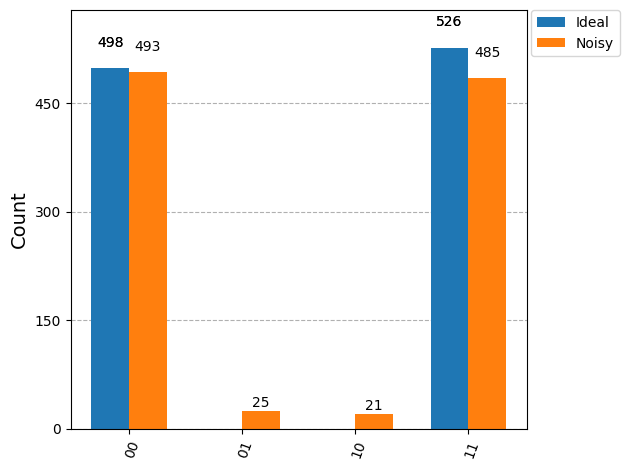

In [1]:
# ==========================
# Noise Simulation on Entangled State
# ==========================

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram

# --------------------------
# 1. Create entangled circuit
# --------------------------

qc = QuantumCircuit(2)

qc.h(0)        # superposition
qc.cx(0,1)     # entanglement

qc.measure_all()

# --------------------------
# 2. Ideal simulation
# --------------------------

backend = Aer.get_backend("qasm_simulator")

job_ideal = backend.run(qc, shots=1024)
result_ideal = job_ideal.result()
counts_ideal = result_ideal.get_counts()

# --------------------------
# 3. Create noise model
# --------------------------

noise_model = NoiseModel()

# depolarizing_error(probability, number_of_qubits_gate_acts_on)
error_1q = depolarizing_error(0.05, 1)  # 5% noise on single-qubit gates
error_2q = depolarizing_error(0.1, 2)   # 10% noise on two-qubit gates

noise_model.add_all_qubit_quantum_error(error_1q, ['h'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

# --------------------------
# 4. Noisy simulation
# --------------------------

job_noisy = backend.run(qc, shots=1024, noise_model=noise_model)
result_noisy = job_noisy.result()
counts_noisy = result_noisy.get_counts()

# --------------------------
# 5. Compare results
# --------------------------

plot_histogram([counts_ideal, counts_noisy],
               legend=['Ideal', 'Noisy'])
